In [41]:
import pyforest

In [42]:
df = pd.read_csv("rfm_dataset.csv", )

In [43]:
df.head()

,r_value,f_value,m_value
0,0,21,1.35
1,-28,1,0.98
2,-15,6,1.37
3,-1,10,1.24
4,-4,11,1.70


In [44]:
quantiles = [0,.25,.5,.75,1]
RFM_labels = [1,2,3,4]

df['R'], R_splits = pd.qcut(df['r_value'], q=quantiles, labels=RFM_labels, retbins=True)
df['F'], F_splits = pd.qcut(df['f_value'], q=quantiles, labels=RFM_labels, retbins=True)
df['M'], M_splits = pd.qcut(df['m_value'], q=quantiles, labels=RFM_labels, retbins=True)

In [45]:
df['RFM'] = df.apply(
    lambda row: str(int(row.R)) + str(int(row.F)) + str(int(row.M)), axis=1)

df['RFM_score'] = df.apply(
    lambda row: row.R + row.F + row.M, axis=1)

<AxesSubplot:>

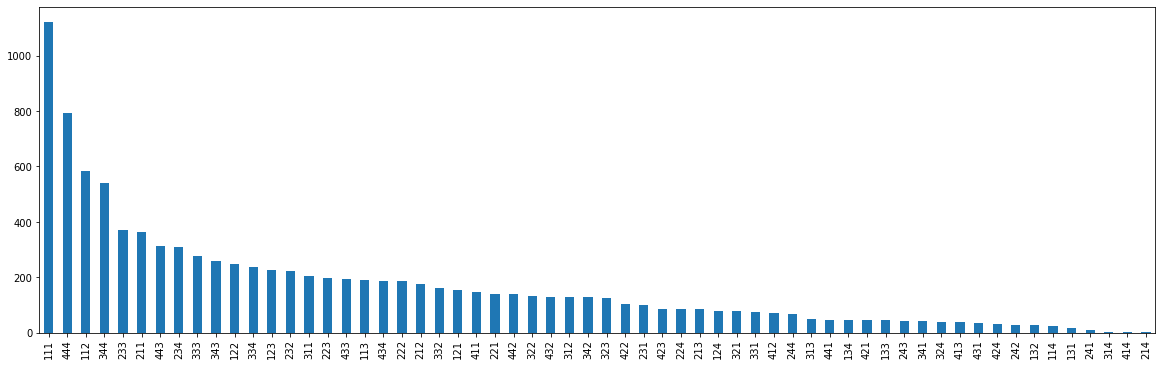

In [46]:
df['RFM'].value_counts().plot(kind='bar', figsize=(20,6))

In [47]:
(df['m_value']*60).describe()

count    10000.000000
mean        66.090360
std         18.209042
min         12.600000
25%         52.800000
50%         64.800000
75%         78.000000
max        142.200000
Name: m_value, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:>

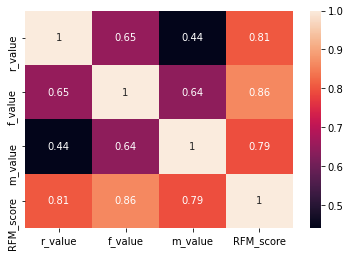

In [48]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:ylabel='Frequency'>

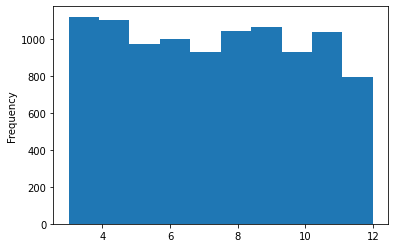

In [49]:
df['RFM_score'].plot(kind='hist')

In [50]:
pd.DataFrame([R_splits, F_splits, M_splits], columns=['min','1->2','2->3','3->4', 'max'], index=['R','F','M'])

,min,1->2,2->3,3->4,max
R,-28.00,-21.00,-14.00,-7.0,0.00
F,1.00,3.00,6.00,12.0,29.00
M,0.21,0.88,1.08,1.3,2.37


In [40]:
df.m_value.max()

2.37